In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=46)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

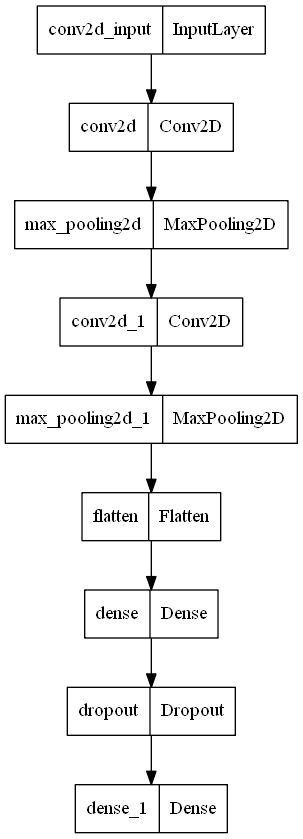

In [7]:
keras.utils.plot_model(model)

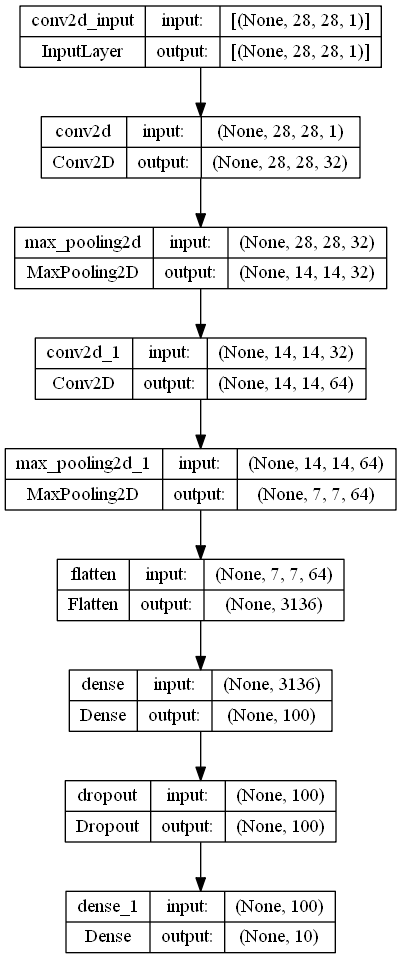

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('../7/best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.5453 - accuracy: 0.8038 - val_loss: 0.3442 - val_accuracy: 0.8755
Epoch 2/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3605 - accuracy: 0.8722 - val_loss: 0.2817 - val_accuracy: 0.8934
Epoch 3/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3085 - accuracy: 0.8902 - val_loss: 0.2518 - val_accuracy: 0.9061
Epoch 4/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2728 - accuracy: 0.9015 - val_loss: 0.2350 - val_accuracy: 0.9120
Epoch 5/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2504 - accuracy: 0.9104 - val_loss: 0.2407 - val_accuracy: 0.9154
Epoch 6/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2258 - accuracy: 0.9171 - val_loss: 0.2283 - val_accuracy: 0.9159
Epoch 7/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2105 - accuracy: 0.9222 - val_loss: 0.2115 -

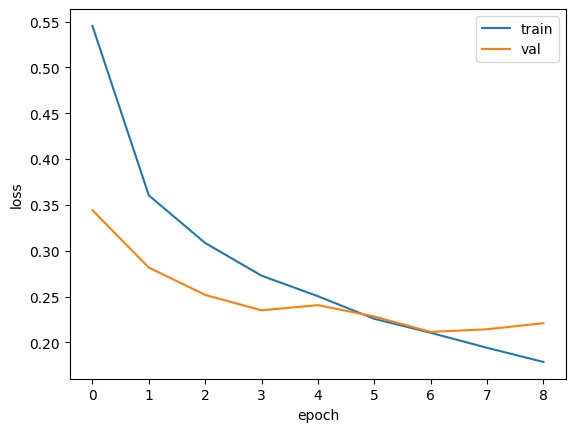

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 10ms/step - loss: 0.2115 - accuracy: 0.9217


[0.21145352721214294, 0.92166668176651]

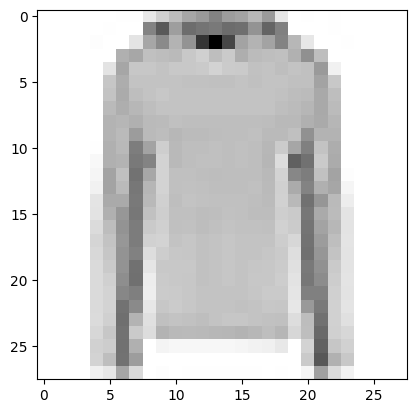

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 159ms/step
[[1.9929697e-05 4.8585269e-09 9.8839474e-01 1.3278744e-06 7.8958543e-03
  2.6313410e-10 3.6881359e-03 9.2953650e-13 1.5825732e-09 2.4377830e-10]]


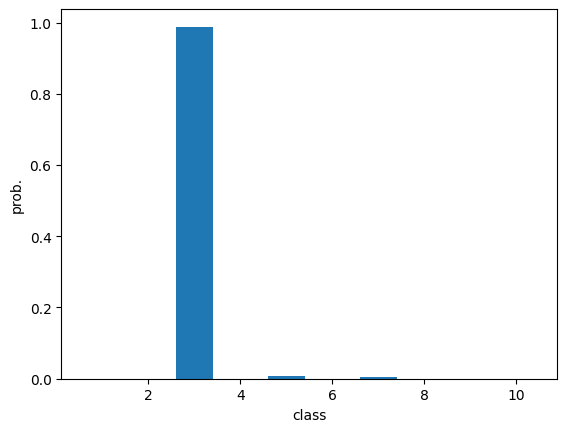

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코드', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

스웨터


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/ 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2371 - accuracy: 0.9135


[0.2371460199356079, 0.9135000109672546]